# Analysis of most promenant algorithm

In this notebook I will document the search for best algrothm to analyse TransferMonitoring data

## Loading and initial setup

In [1]:
%matplotlib inline
# Here i keep prepared csv file for ML
f = open('/home/zygis/_Projektai/CERN/TransferMonitoring/Zygimantas/data/output/out.csv')

import numpy as np
import pandas as pd
from pandas import read_csv
from IPython.display import display, HTML

# in order to display of dataframe
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 30)

dataframe = read_csv(f).astype(np.float32)

# to see struckture of data, uncoment
# dataframe 

# save headers to seperate list
original_headers = list(dataframe.columns.values)

# to see list of headeers, uncoment
print(len(original_headers))
display(original_headers)

53


['block_size',
 'buf_size',
 'channel_type',
 'chk_timeout',
 'dest_srm_v',
 'dst_hostname',
 'dst_site_name',
 'dst_url',
 'endpnt',
 'f_size',
 'file_metadata',
 'file_metadata|activity',
 'file_metadata|adler32',
 'file_metadata|dest_rse_id',
 'file_metadata|dst_rse',
 'file_metadata|dst_type',
 'file_metadata|filesize',
 'file_metadata|md5',
 'file_metadata|name',
 'file_metadata|previous_attempt_id',
 'file_metadata|request_id',
 'file_metadata|scope',
 'file_metadata|src_rse',
 'file_metadata|src_type',
 'job_m_replica',
 'job_metadata',
 'job_metadata|issuer',
 'job_metadata|multi_sources',
 'job_state',
 'nstreams',
 'retry',
 'retry_max',
 'src_hostname',
 'src_site_name',
 'src_srm_v',
 'src_url',
 'srm_space_token_dst',
 'srm_space_token_src',
 't_channel',
 't_error_code',
 't_timeout',
 'tcp_buf_size',
 'time_srm_fin_st',
 'time_srm_prep_st',
 'timestamp_checksum_dest_st',
 'timestamp_chk_src_st',
 'tr_timestamp_complete',
 'tr_timestamp_start',
 'user_dn',
 'vo',
 'tr_id'

# Preprocesing step
## Check if data is missing any value

In [2]:
dataframe.isnull().any()

block_size                    False
buf_size                      False
channel_type                  False
chk_timeout                   False
dest_srm_v                    False
dst_hostname                  False
dst_site_name                 False
dst_url                       False
endpnt                        False
f_size                        False
file_metadata                 False
file_metadata|activity        False
file_metadata|adler32         False
file_metadata|dest_rse_id     False
file_metadata|dst_rse         False
                              ...  
t_channel                     False
t_error_code                  False
t_timeout                     False
tcp_buf_size                  False
time_srm_fin_st               False
time_srm_prep_st              False
timestamp_checksum_dest_st    False
timestamp_chk_src_st          False
tr_timestamp_complete         False
tr_timestamp_start            False
user_dn                       False
vo                          

In [3]:
# -- uncoment to see data types
# types = dataframe.dtypes
# types


In [4]:
try: 
    # if true, dataframe contains infinite numbers(bad)     
    print(np.all(np.isfinite(dataframe)))
except:
    pass

True


In [5]:
try:    
    print(np.any(np.isnan(dataframe)))
except:
    pass

False


Selecting importat features
---------

Since our datasets is quit big, we should reduce the values inorder to save resources and increase computational speed.

First we drop out unvanted columns that for sure will not tell anything important for us.

In [6]:
# fields that are output and can't be used as input
drop_list_output = ['tr_id','t_error_code','tr_timestamp_complete','timestamp_tr_st']
for el in drop_list_output:
    try:
        dataframe = dataframe.drop(el, axis=1)
    except:
        print('There was no such field:{}'.format(el))

# fields that are non vairiating and useless
drop_list_non_variate = ['block_size','buf_size','channel_type',
                            'dst_site_name','src_site_name','t_timeout','src_srm_v','tcp_buf_size']
for el in drop_list_non_variate:
    try:
        dataframe = dataframe.drop(el, axis=1)
    except:
        print('There was no such field:{}'.format(el))

# fields that correlating and useless        
drop_list_correlating =['file_metadata|name','file_metadata|dst_type',
                        'file_metadata|request_id','file_metadata|src_type',
                        'file_metadata|md5','file_metadata|src_rse',
                        'file_metadata|dst_rse','file_metadata|activity',
                        'file_metadata|scope','file_metadata|dest_rse']
for el in drop_list_correlating:
    try:
        dataframe = dataframe.drop(el, axis=1)
    except:
        print('There was no such field:{}'.format(el))


# a=list(dataframe.columns.values)

There was no such field:file_metadata|dest_rse


dataframe itself

In [7]:
from sklearn import preprocessing
dataframe


,chk_timeout,dest_srm_v,dst_hostname,dst_url,endpnt,f_size,file_metadata,file_metadata|adler32,file_metadata|dest_rse_id,file_metadata|filesize,file_metadata|previous_attempt_id,job_m_replica,job_metadata,job_metadata|issuer,job_metadata|multi_sources,job_state,nstreams,retry,retry_max,src_hostname,src_url,srm_space_token_dst,srm_space_token_src,t_channel,time_srm_fin_st,time_srm_prep_st,timestamp_checksum_dest_st,timestamp_chk_src_st,tr_timestamp_start,user_dn,vo,timestamp_tr_dlt
0,0.0,87.146263,85.467171,87.859352,88.701981,2.127745e+09,0.0,-1.000000,-1.000000,-1.000000e+00,-1.0,0.0,0.0,-1.000000,-1.0,87.835594,1.0,0.0,0.0,87.038216,85.465027,0.000000,0.0,86.305840,1.441295e+12,1.441295e+12,0.000000e+00,0.000000e+00,1.441295e+12,88.116028,87.644180,212183.0
1,0.0,87.146263,88.026329,88.401627,88.701981,1.527680e+07,-1.0,87.456703,86.558624,1.527680e+07,-1.0,0.0,-1.0,88.605835,0.0,87.835594,1.0,0.0,0.0,88.091881,88.086586,88.597702,0.0,85.824677,1.441295e+12,1.441295e+12,1.441295e+12,1.441295e+12,1.441295e+12,87.945396,87.703239,4990.0
2,0.0,87.146263,88.678413,87.502213,88.701981,2.666740e+09,-1.0,88.599884,86.596008,2.666740e+09,-1.0,1.0,-1.0,88.605835,1.0,86.970459,1.0,0.0,0.0,85.208282,87.941437,88.450432,0.0,87.870407,1.441295e+12,1.441295e+12,1.441295e+12,1.441295e+12,1.441295e+12,87.945396,87.703239,49873.0
3,1800.0,87.146263,87.771095,87.942703,86.832253,2.685586e+09,0.0,-1.000000,-1.000000,-1.000000e+00,-1.0,0.0,0.0,-1.000000,-1.0,87.835594,12.0,0.0,0.0,88.524872,88.666702,0.000000,0.0,87.681572,1.441295e+12,1.441295e+12,0.000000e+00,0.000000e+00,1.441295e+12,87.995178,87.644180,18264.0
4,1800.0,87.146263,87.771095,86.337303,86.832253,2.999112e+09,0.0,-1.000000,-1.000000,-1.000000e+00,-1.0,0.0,0.0,-1.000000,-1.0,87.835594,12.0,0.0,0.0,88.037361,88.193459,0.000000,0.0,85.213135,1.441295e+12,1.441295e+12,0.000000e+00,0.000000e+00,1.441295e+12,87.995178,87.644180,67894.0
5,1800.0,87.146263,88.303612,83.947197,88.678986,4.900000e+02,-1.0,88.597610,88.207535,4.900000e+02,-1.0,0.0,-1.0,88.605835,0.0,87.835594,1.0,0.0,0.0,87.210854,88.528625,88.474190,0.0,85.573067,1.441295e+12,1.441295e+12,1.441295e+12,1.441295e+12,1.441295e+12,87.945396,87.703239,7397.0
6,1800.0,87.146263,88.485664,85.674934,88.678986,4.107188e+09,-1.0,86.513412,86.722740,4.107188e+09,-1.0,1.0,-1.0,88.605835,1.0,86.970459,14.0,0.0,0.0,87.857178,88.462715,88.597702,0.0,87.572571,1.441295e+12,1.441295e+12,1.441295e+12,1.441295e+12,1.441295e+12,87.945396,87.703239,148101.0
7,1800.0,87.146263,88.485664,88.357704,88.678986,3.976307e+09,-1.0,85.491241,86.722740,3.976307e+09,-1.0,1.0,-1.0,88.605835,1.0,86.970459,14.0,0.0,0.0,88.678413,87.106422,88.597702,0.0,86.840195,1.441295e+12,1.441295e+12,1.441295e+12,1.441295e+12,1.441295e+12,87.945396,87.703239,247014.0
8,1800.0,87.146263,88.303612,86.443489,88.678986,4.900000e+02,-1.0,88.087425,88.207535,4.900000e+02,-1.0,0.0,-1.0,88.605835,0.0,87.835594,1.0,0.0,0.0,87.210854,87.531174,88.474190,0.0,85.573067,1.441295e+12,1.441295e+12,1.441295e+12,1.441295e+12,1.441295e+12,87.945396,87.703239,6980.0
9,1800.0,87.146263,88.485664,88.654030,88.678986,3.949724e+09,-1.0,88.202805,86.722740,3.949724e+09,-1.0,1.0,-1.0,88.605835,1.0,86.970459,14.0,0.0,0.0,88.045921,88.278328,88.597702,0.0,86.880447,1.441295e+12,1.441295e+12,1.441295e+12,1.441295e+12,1.441295e+12,87.945396,87.703239,241822.0


Now we pop out our target column, we will use it for later.

In [8]:
# from dataframe pop target column and transform to ndarray
target=dataframe.pop('timestamp_tr_dlt')

As an end result we will process this kind of matrix.

In [9]:
prepared_headers = list(dataframe.columns.values)
# prepared_headers

More checking on dataframe:

In [10]:
# corr = dataframe.corr().fillna(0).mul(100).astype(int)
corr = dataframe.corr().fillna(0).mul(100).astype(int)
corr

,chk_timeout,dest_srm_v,dst_hostname,dst_url,endpnt,f_size,file_metadata,file_metadata|adler32,file_metadata|dest_rse_id,file_metadata|filesize,file_metadata|previous_attempt_id,job_m_replica,job_metadata,job_metadata|issuer,job_metadata|multi_sources,job_state,nstreams,retry,retry_max,src_hostname,src_url,srm_space_token_dst,srm_space_token_src,t_channel,time_srm_fin_st,time_srm_prep_st,timestamp_checksum_dest_st,timestamp_chk_src_st,tr_timestamp_start,user_dn,vo
chk_timeout,100,-20,23,0,-36,17,-22,1,22,12,-27,-8,0,0,8,4,39,0,0,6,0,24,8,-2,31,0,44,29,-17,-18,-26
dest_srm_v,-20,100,4,0,-9,-4,3,0,-2,-1,8,0,-1,1,-1,0,-19,0,0,-5,0,-1,2,2,-8,-1,-17,-13,-5,19,3
dst_hostname,23,4,100,0,0,0,-42,2,42,8,9,10,-49,49,31,-7,-3,0,0,3,0,43,1,-11,-7,-4,37,48,-1,-16,-58
dst_url,0,0,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
endpnt,-36,-9,0,0,100,-20,-35,2,35,4,11,16,-49,49,31,-12,-36,0,0,0,0,25,-46,4,-11,-2,8,16,12,29,44
f_size,17,-4,0,0,-20,100,21,-1,-22,71,-13,11,32,-32,-6,-10,58,0,3,-11,0,-22,-4,-8,9,-1,-7,-18,-5,-18,-14
file_metadata,-22,3,-42,0,-35,21,100,-7,-99,-21,-20,-37,79,-79,-83,29,27,0,1,-18,0,-96,16,1,3,-14,-66,-89,2,-17,0
file_metadata|adler32,1,0,2,0,2,-1,-7,100,7,1,1,2,-5,5,5,-2,-2,0,0,1,0,6,-1,0,0,1,4,6,0,1,0
file_metadata|dest_rse_id,22,-2,42,0,35,-22,-99,7,100,21,20,37,-79,79,83,-29,-28,0,-1,18,0,96,-16,-1,-3,14,66,89,-2,17,0
file_metadata|filesize,12,-1,8,0,4,71,-21,1,21,100,-6,33,-17,17,33,-28,19,0,0,1,0,20,-3,-4,9,2,21,19,-1,3,0


Lets see corelation matrix, ploted
------

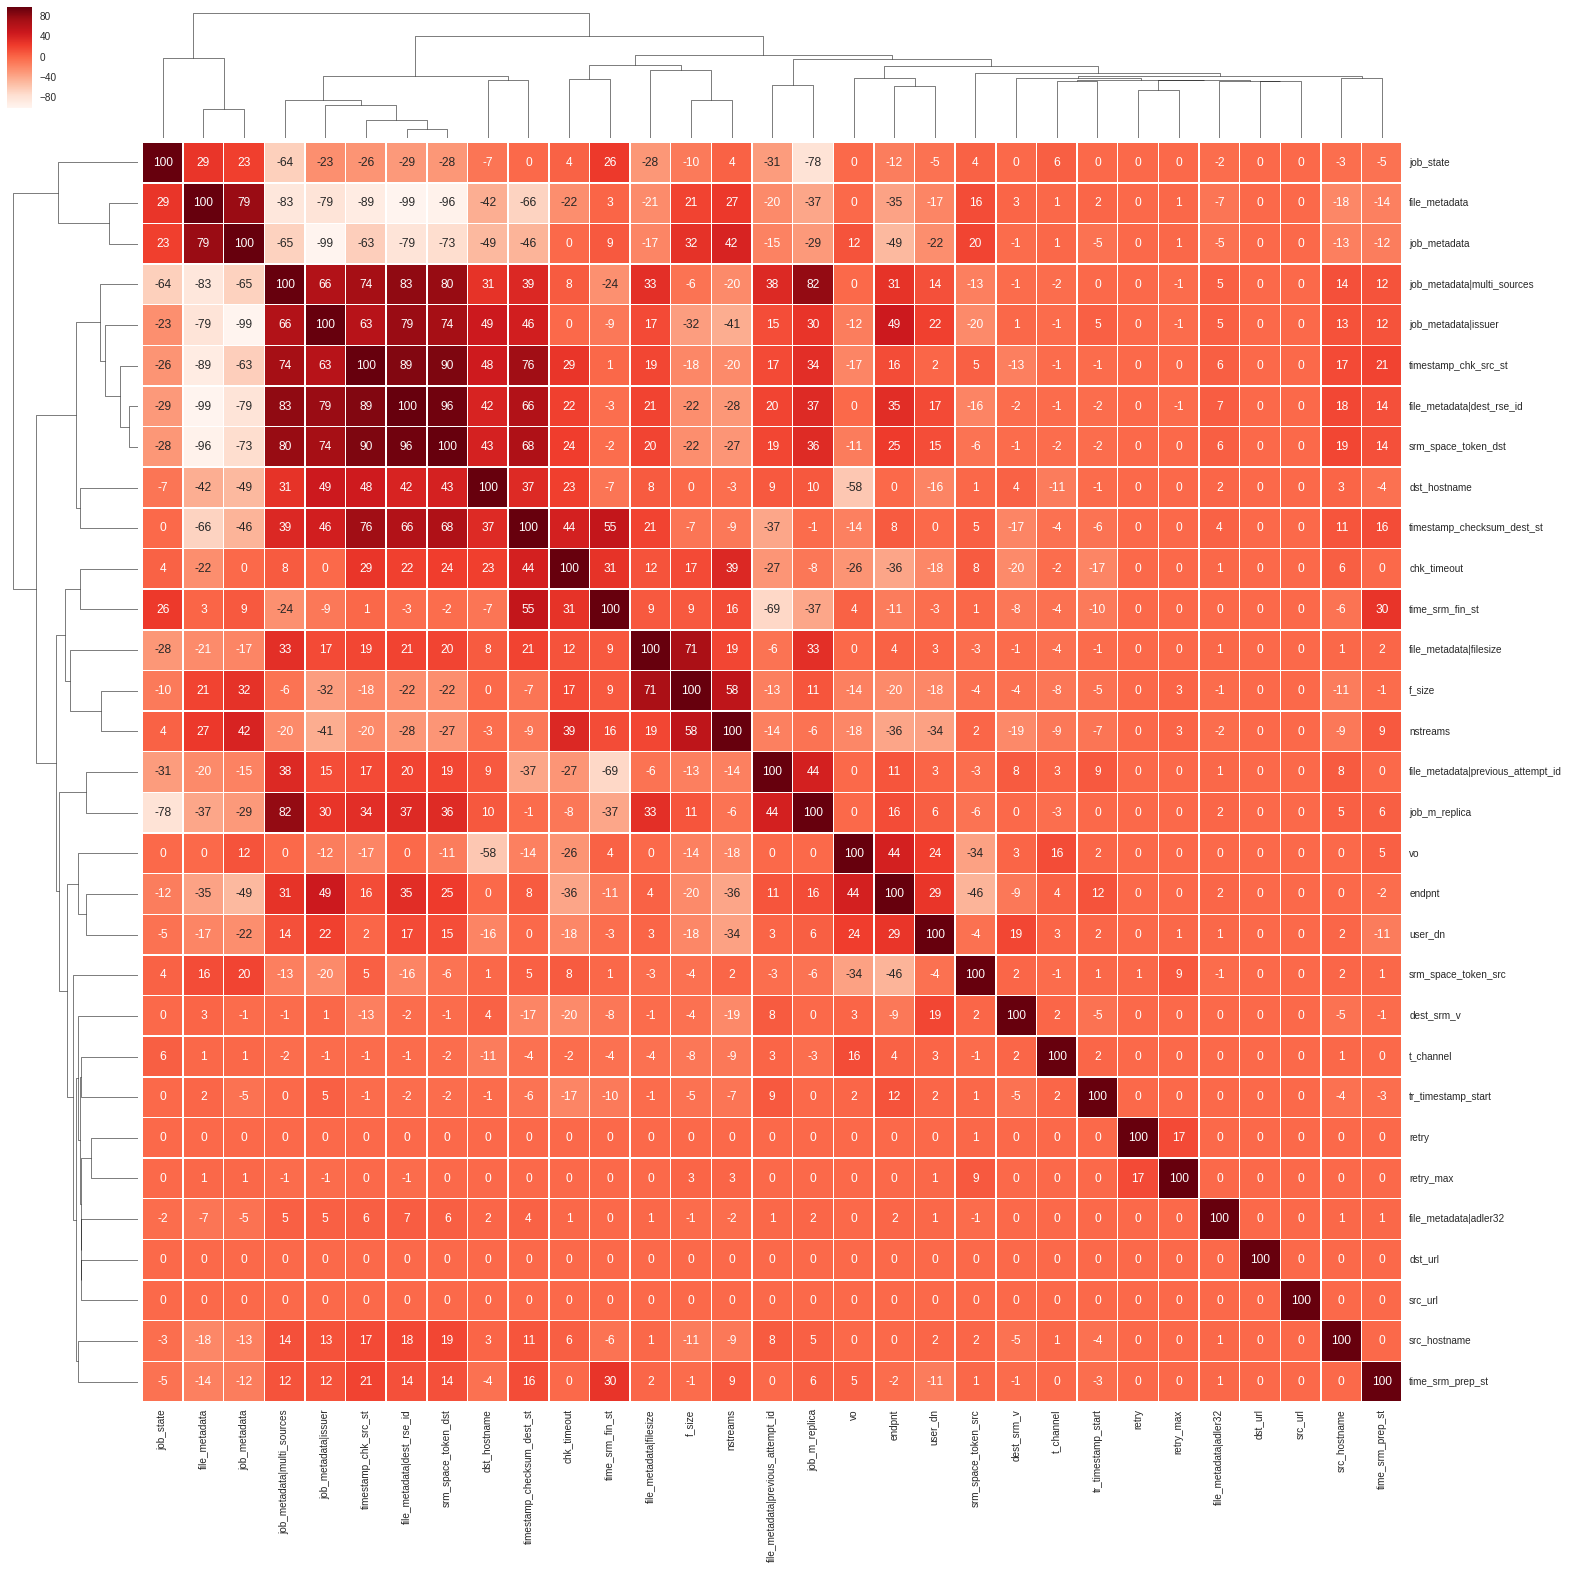

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# corr = pd.DataFrame(X_noVariance).corr().fillna(0).mul(100).astype(int)


cg = sns.clustermap(figsize=(25,25),data=corr, annot=True, fmt='d', cmap='Reds', linewidths=.5)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt
sns.plt.show()

Checking for colums with no variance
----

In [12]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold()
# X_noVariance = sel.fit_transform(dataframe) # get new array
X_noVariance = sel.fit(dataframe) # get treshold with support


support_list = sel.get_support()
a= [i for i,x in enumerate(support_list) if x == 0]
# atributes with 0 change
for i in a:
    print(i,original_headers[i])

## Removing non variating values and correlation 

Trying scaling on data
------

In [13]:

matrix_to_scale = dataframe.as_matrix()
# matrix_to_scale

In [14]:
# scale_X = preprocessing.scale(matrix_to_scale)
# # type(matrix_to_scale)
# scale_X

#  scale between [0;1]
min_max_scaler = preprocessing.MinMaxScaler()
X_scalled = min_max_scaler.fit_transform(matrix_to_scale)
X_scalled  

array([[ 0.        ,  1.        ,  0.31715965, ...,  0.3671875 ,
         0.93359184,  0.56125641],
       [ 0.        ,  1.        ,  0.85492325, ...,  0.375     ,
         0.91484737,  0.61546326],
       [ 0.        ,  1.        ,  0.99194717, ...,  0.37109375,
         0.91484737,  0.61546326],
       ..., 
       [ 1.        ,  0.        ,  0.73453522, ...,  1.        ,
         0.91484737,  0.61546326],
       [ 0.        ,  1.        ,  0.79913139, ...,  0.99609375,
         0.90044212,  0.56125641],
       [ 0.        ,  1.        ,  0.6904583 , ...,  0.98828125,
         0.96848297,  0.56125641]], dtype=float32)

ML learning phase
-----

Now we are preparing to matrixes to for analysis by transforming them to ndarray. One will be data, another one will be our target:

In [15]:
X = X_scalled
y = target.as_matrix()

Just to be sure, lets see how prepared data looks:

In [16]:
X

array([[ 0.        ,  1.        ,  0.31715965, ...,  0.3671875 ,
         0.93359184,  0.56125641],
       [ 0.        ,  1.        ,  0.85492325, ...,  0.375     ,
         0.91484737,  0.61546326],
       [ 0.        ,  1.        ,  0.99194717, ...,  0.37109375,
         0.91484737,  0.61546326],
       ..., 
       [ 1.        ,  0.        ,  0.73453522, ...,  1.        ,
         0.91484737,  0.61546326],
       [ 0.        ,  1.        ,  0.79913139, ...,  0.99609375,
         0.90044212,  0.56125641],
       [ 0.        ,  1.        ,  0.6904583 , ...,  0.98828125,
         0.96848297,  0.56125641]], dtype=float32)

In [17]:
y

array([  2.12183000e+05,   4.99000000e+03,   4.98730000e+04, ...,
         8.24800000e+03,  -1.00000000e+00,   5.29930000e+04], dtype=float32)

In [18]:
import math
log_f= lambda x: math.log(x+2)
# log_f= lambda x: x

y = list(map(log_f,y))

# math.log(y+2)
# y

Now we will split data to train/test:

In [19]:
from sklearn.cross_validation import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=92)
len(X_train), len(X_test)

(459294, 226220)

Now we are prepared. Lets check some models and see results.

Algortihm benchmark
--------




RandomForestRegressor
----------------
First lets see how well RandomForestRegressor performs.

In [20]:
# Fit a Random Forest 
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

exp_2 = lambda x: math.exp(x) -2
y_test = list(map(exp_2,y_test))
y_pred = list(map(exp_2,y_pred))

output=[]
# comparing real values to predicted
for answ, pred in zip(y_test, y_pred): 
    output.append( (answ,pred) )
display(output[:100])
    


[(3406.0000000000023, 3491.902477824423),
 (6107.999999999997, 7103.646774367905),
 (121975.00000000009, 112322.50449417302),
 (2102.9999999999995, 3962.7778881041145),
 (71452.99999999996, 68134.0758195073),
 (3286.0000000000023, 3544.307922297102),
 (943.9999999999998, 1501.9698710102093),
 (2565.0, 2786.433513693129),
 (204088.00000000015, 199392.8234692018),
 (-1.0, -1.0),
 (7654.000000000003, 7584.941674623353),
 (140282.99999999994, 72630.21798235046),
 (87693.00000000001, 111393.1171378876),
 (25554.999999999978, 56240.95341824327),
 (418282.00000000023, 347560.889726857),
 (13211.999999999993, 18815.05836561625),
 (22015.000000000007, 12295.113212218486),
 (-1.0, -1.0),
 (3892.000000000003, 3977.1743071994642),
 (-1.0, -1.0),
 (3874.9999999999973, 4830.185085054132),
 (-1.0, -1.0),
 (3967.9999999999986, 3877.7199021348574),
 (1324.0, 2168.7448207036505),
 (10227.999999999998, 9156.226971120526),
 (97482.99999999993, 131307.48943348855),
 (2256268.000000001, 2191146.8616762506),

Error rates of this model:

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error 
print('MAE: {0}'.format(mean_absolute_error(y_test,y_pred)))
print ('RMSE: {0}'.format(mean_squared_error(y_test,y_pred)))

MAE: 27519.077390188402
RMSE: 18616722604.5459




Resources
-------
- http://stackoverflow.com/questions/11023411/how-to-import-csv-data-file-into-scikit-learn
- http://pandas.pydata.org/
- http://scikit-learn.org/stable/modules/scaling_strategies.html
- http://stackoverflow.com/questions/9590114/importance-of-pca-or-svd-in-machine-learning
- http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
- http://scikit-learn.org/stable/modules/feature_selection.html#variance-threshold
- http://stackoverflow.com/questions/29298973/removing-features-with-low-variance-scikit-learn